In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et
import numpy as np
import feather
from besser_tanken.config import stations_dir
#from besser_tanken.config import stations_dir, feather_dir
from besser_tanken.data_loader import load_prices_from, load_stations
from besser_tanken.data_tools import group_prices

In [ ]:
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [ ]:
#df = feather.read_dataframe(f"{stations_dir}/2021/01/2021-01-01-stations.feather")

In [ ]:
#data = load_prices_from(2020,11,1)
df = load_prices_from(2020,11,1)
df = pd.DataFrame(df)

In [ ]:
df.e5 = df['e5'].astype(float)
df.e10 = df['e10'].astype(float)
df.diesel = df['diesel'].astype(float)

In [ ]:
df["date_time"] = pd.to_datetime(df.date, infer_datetime_format=True, utc=True)
df["hour"] = df.date_time.dt.hour
df["month"] = df.date_time.dt.month
df["quarter"] = df.date_time.dt.quarter
df["year"] = df.date_time.dt.year
df["day"] = df.date_time.dt.day
df["week"] = df.date_time.dt.isocalendar().week
df["weekday"] = df.date_time.dt.weekday
df["season"] = np.where(df["month"].isin([3,4,5]),"spring",
   np.where(df["month"].isin([6,7,8]),"summer",
   np.where(df["month"].isin([9,10,11]),"fall",
   np.where(df["month"].isin([12,1,2]),"winter","None"))))
#buehl["weekday_name"] = np.where(df["weekday"].isin([0]),"mon",
#   np.where(df["weekday"].isin([1]),"tue",
#   np.where(df["weekday"].isin([2]),"wed",
#   np.where(df["weekday"].isin([3]),"thu",
#   np.where(df["weekday"].isin([4]),"fri",            
#   np.where(df["weekday"].isin([5]),"sat",            
#   np.where(df["weekday"].isin([6]),"sun","None")))))))

In [ ]:
#df["date_time"] = pd.to_datetime(df.date)
#df["month"] = df["date_time"].dt.month

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
grouped_by_station = df.groupby('station_uuid').mean()

In [ ]:
grouped_by_station['diesel'].plot()

In [ ]:
grouped_by_station['diesel'].nlargest(20).plot()

In [ ]:
grouped_by_station['diesel'].nsmallest(20).plot()

In [ ]:
stations = load_stations()

In [ ]:
stations_df = pd.DataFrame(stations)

In [ ]:
merged = pd.merge(df, stations_df[['uuid','post_code']], how="outer", left_on=["station_uuid"],right_on=["uuid"])

In [ ]:
merged.head()

In [2]:
feather_file = "merged.feather"
feather.write_dataframe(merged, feather_file)

NameError: name 'merged' is not defined

In [3]:
merged = feather.read_dataframe(feather_file)

In [7]:
plz_grouped = merged.groupby('post_code').mean()

<AxesSubplot:xlabel='post_code'>

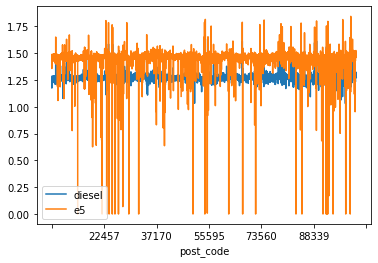

In [13]:
plz_grouped[['diesel','e5']].plot()

In [ ]:
#prices = group_prices(data)

In [6]:
buehl_stations = filter(lambda s: s['post_code'] in ['77815'], stations)
buehl_station = list(buehl_stations)[0]
#buehl = prices[buehl_station['uuid']]
buehl = df[df["station_uuid"] == buehl_station['uuid']]

NameError: name 'stations' is not defined

In [ ]:
#buehl_station = next(buehl_stations)
print(buehl_station)

In [ ]:
buehl= pd.DataFrame(buehl)

In [ ]:
buehl["date"] 

In [ ]:
buehl["date_time"] = pd.to_datetime(buehl.date, infer_datetime_format=True, utc=True)
#buehl["date_time"] = pd.to_datetime(buehl.date)

In [ ]:
#buehl["date_time"] = pd.to_datetime(buehl.date, format='%Y-%m-%d %H:%M:%S%z')

In [ ]:
buehl.date_time

In [ ]:
buehl.date

In [ ]:
d = pd.to_datetime(buehl.iloc[0].date)

In [ ]:
d

In [ ]:
d.month

In [ ]:
pd.DatetimeIndex(buehl['date_time'])

In [ ]:
buehl["hour"] = buehl.date_time.dt.hour
buehl["month"] = buehl.date_time.dt.month
buehl["quarter"] = buehl.date_time.dt.quarter
buehl["year"] = buehl.date_time.dt.year
buehl["day"] = buehl.date_time.dt.day
buehl["week"] = buehl.date_time.dt.isocalendar().week
buehl["weekday"] = buehl.date_time.dt.weekday
buehl["season"] = np.where(buehl["month"].isin([3,4,5]),"spring",
   np.where(buehl["month"].isin([6,7,8]),"summer",
   np.where(buehl["month"].isin([9,10,11]),"fall",
   np.where(buehl["month"].isin([12,1,2]),"winter","None"))))
buehl["weekday_name"] = np.where(buehl["weekday"].isin([0]),"mon",
   np.where(buehl["weekday"].isin([1]),"tue",
   np.where(buehl["weekday"].isin([2]),"wed",
   np.where(buehl["weekday"].isin([3]),"thu",
   np.where(buehl["weekday"].isin([4]),"fri",            
   np.where(buehl["weekday"].isin([5]),"sat",            
   np.where(buehl["weekday"].isin([6]),"sun","None")))))))

In [ ]:
buehl.columns

In [ ]:
buehl.info()

In [ ]:
buehl.head(100)

In [ ]:
buehl.e5 = buehl['e5'].astype(float)
buehl.e10 = buehl['e10'].astype(float)
buehl.diesel = buehl['diesel'].astype(float)

In [ ]:
weekday_groups = buehl.groupby("weekday_name").mean()
weekday_num_groups = buehl.groupby("weekday").mean()
weekday_groups.head()

In [ ]:
weekday_groups[['diesel', 'e5', 'e10']].plot.bar()

In [ ]:
weekday_num_groups[['diesel', 'e5', 'e10']].plot()

In [ ]:
buehl.groupby(["hour"]).mean()[['e5', 'e10','diesel']].plot()

In [ ]:
buehl.groupby(["weekday", "hour"]).mean()[['e5', 'e10','diesel']].plot()

In [ ]:
buehl.groupby(["year","week"]).mean()[['e5', 'e10','diesel']].plot()

In [ ]:
sns.lineplot(x="date", y="diesel",
             data=buehl)

In [ ]:
sns.lineplot(x="date", y="e5", 
             data=buehl[0:100])

In [ ]:
buehl_melted = buehl.melt('date', var_name='cols',  value_name='vals', value_vars=["diesel", "e5", "e10"])
sns.lineplot(x="date", y="vals", hue='cols', data=buehl_melted)
fig = plt.gcf()
fig.set_size_inches( 16, 10)

In [ ]:
b2 = buehl.drop('station_uuid')
#b2 = b2.melt('date', var_name='cols', value_name='vals')
#g = sns.factorplot(x="date", y="vals", hue='cols', data=b2)